# Desafio **Indicium** – Cientista de Dados  – Análise Cinematográfica


# Entregas 
1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!

2. Responda também às seguintes perguntas:
   1. Qual filme você recomendaria para uma pessoa que você não conhece?
   2. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
   3. Quais insights podem ser tirados com a coluna *Overview?* É possível inferir o gênero do filme a partir dessa coluna?
3. Explique como você faria a previsão da **nota do imdb** a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?
4. Supondo um filme com as seguintes características:

   {'Series\_Title': 'The Shawshank Redemption',
   'Released\_Year': '1994',
   'Certificate': 'A',
   'Runtime': '142 min',
   'Genre': 'Drama',
   'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
   'Meta\_score': 80.0,
   'Director': 'Frank Darabont',
   'Star1': 'Tim Robbins',
   'Star2': 'Morgan Freeman',
   'Star3': 'Bob Gunton',
   'Star4': 'William Sadler',
   'No\_of\_Votes': 2343110,
   'Gross': '28,341,469'}

Qual seria a nota do IMDB?

5. Salve o modelo desenvolvido no formato .pkl.
6. A entrega deve ser feita através de um repositório de código público que contenha:
   1. README explicando como instalar e executar o projeto
   2. Arquivo de requisitos com todos os pacotes utilizados e suas versões
   3. Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2\.
   4. Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
   5. Arquivo .pkl conforme passo 5 acima.

Todos os códigos produzidos devem seguir as boas práticas de codificação.

---
# Respostas
---


## Entrega 1. Análise Exploratória de Dados (EDA)

A análise exploratória dos dados (EDA) foi realizada para compreender as principais características do dataset e identificar padrões, relações e hipóteses para análises futuras ou modelagem preditiva.


### 1.0 Análise Univariada
- Avaliação individual de cada variável para entender distribuição, presença de valores ausentes e outliers.
- Principais ações:
  - Identificação de **valores ausentes** e proporção de NAs.
  - Contagem de **valores únicos** e frequência das categorias.
  - Determinação da **moda** para variáveis categóricas.
  - Análise de **média, mediana, skew e kurtosis** para variáveis numéricas.
- **Insight:** Nenhum diretor ou ator domina significativamente, indicando **alta diversidade/baixa concentração**.


### 1.1 Análise Bivariada
- Exploração das relações entre pares de variáveis.
- Principais técnicas:
  - **Numérica x Numérica:** scatter plot e correlação (ex.: Gross x IMDB_Rating).
  - **Numérica x Categórica:** boxplots ou ANOVA (ex.: IMDB_Rating por Certificate ou Genre).
  - **Categórica x Categórica:** tabelas de contingência e teste Qui-quadrado (ex.: elenco/diretor x faixas de IMDB_Rating).
- **Insight:** Alguns diretores e atores estão associados a notas médias mais altas; Gross apresenta correlação positiva com IMDB_Rating.


### 1.2 Análise Multivariada
- Avaliação de múltiplas variáveis simultaneamente para capturar interações complexas.
- Principais técnicas:
  - **Regressão múltipla** de IMDB_Rating considerando Gross, Runtime e Meta_score.
  - **Pairplots e heatmaps** para visualizar dependências entre variáveis.
  - Análise de interações entre elenco, gênero e métricas numéricas.
- **Insight:** Agrupamentos históricos (média de Gross ou nota por ator/diretor) podem gerar preditores robustos, sem causar data leakage.


### 1.3 Hipóteses geradas
- H_1: Existe associação entre elenco/diretores e filmes com notas mais altas.
- H_2: Variáveis financeiras, como Gross, têm correlação positiva com IMDB_Rating.
- H_3: Certas categorias de Genre ou Certificate podem influenciar a nota média.
- H_4: Estatísticas agregadas por histórico de atores/diretores podem ser boas preditoras.

---

## 2. Entrega 2

### 2.1 Sistema de Recomendação

Podemos construir um sistema de recomendação a partir da concatenação de todas as variáveis textuais disponíveis. A partir dessa variável consolidada, existem duas abordagens principais para representação dos textos:

1. **Embeddings**  
   - Capturam a semântica dos textos.  
   - Permitem identificar proximidade de significado, mesmo quando palavras diferentes são utilizadas.  

2. **Vetorização esparsa (TF-IDF)**  
   - Captura a relevância de termos com base em sua frequência.  
   - É mais eficaz para identificar correspondência exata de palavras.  
   - Requer pré-processamento, como:  
     - remoção de *stopwords*  
     - normalização  
     - lematização (opcional)  

Em ambos os casos, podemos calcular a similaridade entre dois filmes por meio do **cosseno do ângulo entre seus vetores** (*cosine similarity*).  
- Valores próximos de **1** indicam alta similaridade.  
- Valores próximos de **0** indicam ausência de relação (vetores ortogonais).  

Dessa forma, ao receber o título de um filme que o usuário já assistiu (desde que presente na base), é possível recomendar os **Top-5 filmes mais similares** de acordo com sua representação vetorial.


### 2.2 Hipótese de Expectativa de Faturamento

Com base nas análises exploratórias (correlações e testes de associação), identificamos alguns fatores relacionados à **alta expectativa de faturamento de um filme**:

- **Número de votos (No_of_Votes)**: apresentou correlação moderada e positiva (~0,6) com o faturamento.  
- **Avaliação IMDB (IMDB_Rating)**: possui relação positiva com o número de votos, o que indiretamente reforça sua conexão com o faturamento.  
- **Variáveis categóricas** como **Certificate, Genre, Diretor e Elenco** mostraram associação significativa (nível de 5%) com faixas de faturamento.  

Assim, formulamos a hipótese:

**H₁:** Filmes com maior número de votos, avaliações mais altas e pertencentes a determinados gêneros ou certificados têm maior probabilidade de alcançar faturamento elevado.

### 2.3. Insights a partir da coluna *Overview*

A coluna *Overview* contém descrições textuais dos filmes. Em tese, ela pode ser explorada para extrair informações sobre enredo, temática e estilo narrativo. Surge então a seguinte hipótese:

**H₃ (pendente):** É possível inferir o gênero do filme a partir da coluna *Overview*.  

No entanto, na análise preliminar, não encontramos um *match* direto entre o texto do *Overview* e o gênero declarado (*Genre*).  
Com apenas 1000 observações disponíveis, técnicas clássicas de bag-of-words podem não capturar as nuances semânticas necessárias.  

Duas abordagens mais promissoras seriam:  
- **Modelos pré-treinados de linguagem (ex.: BERT com *fine-tuning*)**, que captam relações semânticas profundas.  
- **Modelos de IA generativa**, que podem interpretar contexto narrativo para mapear em gêneros.  

Portanto, esta hipótese permanece em aberto e será explorada em etapas futuras.

---

### 3. Previsão da Nota do IMDB

**Tipo de problema:**  
Estamos lidando com um problema de **regressão supervisionada**, pois a variável-alvo (*IMDB_Rating*) é numérica e contínua.

**Variáveis consideradas:**  
- **Numéricas:**  
  - `Gross`, `No_of_Votes`, `Meta_score`, `Runtime`.  
  Essas variáveis são bons preditores porque apresentam correlação positiva (embora não perfeita) com a nota.  
  Transformações como *log(Gross)* podem ser aplicadas para reduzir a assimetria.  

- **Categóricas:**  
  - `Genre`, `Certificate`, `Director`, `Stars`.  
  Necessitam de *encoding*. Por exemplo:  
  - *Top-k encoding* para `Director` e `Stars` (para reduzir dimensionalidade).  
  - *One-hot encoding* ou *target encoding* para `Genre` e `Certificate`.  

- **Textuais:**  
  - `Overview`. Pode ser vetorizado via TF-IDF ou embeddings (BERT, por exemplo), mas dada a limitação de dados, começaria com TF-IDF para capturar frequência de termos relevantes.  

**Por que não regressão linear simples?**  
- Regressão linear exige relação linear entre as variáveis independentes e o alvo, além de normalidade dos resíduos e ausência de multicolinearidade.  
- Nossos dados não cumprem essas premissas: temos variáveis categóricas de alta cardinalidade, variáveis numéricas assimétricas e relações não lineares.  

**Modelos candidatos:**  
- **Árvores de decisão / Random Forest:**  
  - **Prós:** Lidam bem com variáveis categóricas (após encoding simples), não exigem normalização, capturam interações não lineares.  
  - **Contras:** Podem sobreajustar; menos interpretáveis.  

- **Gradient Boosting (ex.: XGBoost, LightGBM):**  
  - **Prós:** Melhor performance preditiva em geral, robusto para diferentes tipos de dados, captura bem relações complexas.  
  - **Contras:** Mais lento para treinar, mais difícil de interpretar.  

- **Modelos lineares regulares (Ridge, Lasso):**  
  - **Prós:** Boa interpretabilidade, podem servir como baseline.  
  - **Contras:** Não capturam não-linearidades de forma adequada.  

**Medida de performance escolhida:**  
- **RMSE (Root Mean Squared Error):** penaliza mais erros grandes, útil pois queremos evitar previsões muito distantes da nota real.  
- **R²:** mede a proporção da variância explicada, útil para comunicar a qualidade geral do ajuste.  

**Conclusão preliminar:**  
O modelo que melhor se adapta ao problema é um **ensemble baseado em boosting (como Gradient Boosting ou LightGBM)**, pois equilibra viés e variância e lida bem com dados heterogêneos. A regressão linear pode ser usada como baseline, mas não é adequada como modelo final.

# Imports

In [1]:
import sys
from pathlib import Path
project_root = Path.cwd().parent       
sys.path.append(str(project_root / "src"))      
from functions import *  # Vide src/functions.py 

# Lendo CSV principal

In [3]:
# Dados do desafio 
raw_df = pd.read_csv(DATA_DIR / "desafio_indicium_imdb.csv").drop(columns= ["Unnamed: 0"], errors= "ignore")


In [14]:
# Dados externos 
raw_df_tmdb = pd.read_csv(DATA_DIR / "tmdb-movies.csv").drop(columns= ["Unnamed: 0"], errors= "ignore")
raw_df_ext= pd.read_csv(DATA_DIR / "imdb-movies-dataset.csv").drop(columns= ["Unnamed: 0"], errors= "ignore")

In [11]:
len(set(raw_df_ext['Director']) - set(raw_df_tmdb['director'])) 

2418

In [3]:
raw_df.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [ ]:
raw_df_tmdb.head(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Vamos enriquecer os dados internos adicionando variáveis externas como popularity, budget, tagline, vote_average e também revenue. Essas informações são relevantes porque ajudam a capturar diferentes dimensões do filme: engajamento do público (popularity), escala de produção (budget), posicionamento de marketing (tagline), percepção da audiência (vote_average) e resultado financeiro (revenue).

In [14]:
raw_df_tmdb =raw_df_tmdb [['director','popularity','budget','vote_average','revenue']].rename(columns= {'director':'Director'})


In [ ]:
normalize =  lambda text: str(text.lower().strip())
raw_df_tmdb['Director'] = raw_df_tmdb['Director'].astype(str).apply(normalize)
raw_df['Director'] = raw_df['Director'].astype(str).apply(normalize)




In [56]:
from rapidfuzz import process, distance

def map_director(name):
    small_directors = list(raw_df['Director'])
    if name in small_directors:
        return name
    else:
        match, score, _ = process.extractOne(
            query=name,
            choices=small_directors,
            scorer=distance.Levenshtein.distance  # distância de edição correta
        )
        if score <= 4:
            return match
        else:
            return None


In [57]:
raw_df_tmdb['match_director'] = raw_df_tmdb['Director'].apply(map_director)

In [58]:
raw_df_tmdb = raw_df_tmdb.dropna(subset = ['match_director']).reset_index(drop=True)

In [59]:
len(set(raw_df_tmdb['match_director']))

392

In [ ]:
merged = raw_df.merge(raw_df_tmdb, on='Director', how='left').reset_index(drop=True)

In [38]:
merged = merged.dropna(subset=['popularity','budget','vote_average','revenue']).reset_index(drop=True)

In [ ]:
merged

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,popularity,budget,vote_average,revenue
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,francis ford coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",0.414910,15000000.0,6.7,113221.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,francis ford coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",0.362217,7000000.0,4.7,0.0
2,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,francis ford coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",1.008461,40000000.0,6.5,45916769.0
3,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,francis ford coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",5.738034,6000000.0,8.3,245066411.0
4,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,francis ford coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",0.281136,0.0,6.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6096,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,alfred hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN,2.610362,806948.0,8.0,32000000.0
6097,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,alfred hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN,0.600495,2000000.0,6.7,7900000.0
6098,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,alfred hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN,1.139321,2500000.0,7.0,11403529.0
6099,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,alfred hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN,0.567962,4000000.0,5.7,0.0


In [ ]:
#Checando diferença 
directors_raw = set(raw_df['Director'])

directors_merged = set(merged['Director'])

missing_directors = directors_raw - directors_merged
print(missing_directors)
len(missing_directors)

{'asghar farhadi', 'clyde bruckman', 'mamoru hosoda', 'shûsuke kaneko', 'alejandro amenábar', 'aniruddha roy chowdhury', 'rahi anil barve', 'hannes holm', 'paolo genovese', 'elem klimov', 'raja menon', 'neeraj pandey', 'sriram raghavan', 'carl theodor dreyer', 'hong-jin na', 'deniz gamze ergüven', 'anthony russo', 'f.w. murnau', 'leo mccarey', 'jordan peele', 'abhishek chaubey', 'katsuhiro ôtomo', 'victor fleming', 'james frawley', 'raoul walsh', 'daniel monzón', 'damián szifron', 'bong joon ho', 'kaige chen', 'darius marder', 'nishikant kamat', 'thomas jahn', 'cristian mungiu', 'mamoru oshii', 'travis knight', 'krzysztof kieslowski', 'tetsuya nakashima', 'byron howard', 'jae-young kwak', 'vikramaditya motwane', 'jemaine clement', 'georges franju', 'bob persichetti', 'shoojit sircar', 'jean-marc vallée', 'vincent paronnaud', 'henri-georges clouzot', 'bradley cooper', 'jonathan dayton', 'mikael håfström', 'tigmanshu dhulia', 'vishal bhardwaj', 'yilmaz erdogan', 'imtiaz ali', 'david mick

185

In [46]:
print(len((set(raw_df_tmdb['Director']))))

5067


In [10]:
raw_df_tmdb['overview'][0]

'Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.'

# Informações Gerais do Dataset

In [35]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


# Padronizações Globais (Sem Data Leakage)

## Convertendo Released_Year, Gross e Runtime para numérico


In [4]:
# =========================================
# Convertendo Released_Year, Gross e Runtime para numérico
# =========================================

raw_df['Released_Year'] = pd.to_numeric(raw_df['Released_Year'].str.strip(), errors='coerce').astype('Int64')

# Gross para float 
raw_df['Gross'] = (
    raw_df['Gross']
    .str.replace(r'[^0-9.]', '', regex=True)  
    .replace('', pd.NA)                        
    .astype('float')
)

# Runtime para minutos como inteiro (assumindo formato "123 min")
raw_df['Runtime'] = (
    raw_df['Runtime']
    .str.extract(r'(\d+)')  
    .astype('Int64')         # converte para inteiro com suporte a NaN
)


## Conversão de Colunas Não Numéricas para String

In [5]:
for col in raw_df.select_dtypes(include=['object']).columns:
    raw_df[col] = raw_df[col].astype('string')

## Criando uma nova coluna: Faixa de IMDB_Rating

> A criação desta coluna será útil para analisar a associação entre variáveis **qualitativas** (como elenco e diretores) e o **target**, transformado de contínuo para categórico.  
> A hipótese é que **exista uma associação significativa** entre certos diretores ou atores e filmes com IMDB_Rating mais alto, podendo ser avaliada via **teste Qui-quadrado**.


In [6]:
# Definindo bins e labels
#bins = [0, 5, 6, 7, 8, 9, 10]  # ajustar conforme a distribuição desejada
#labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto', 'Excelente']
#Abordabem via quantiles
quantiles = raw_df['IMDB_Rating'].quantile([0, 0.25, 0.5, 0.75, 1])
labels     =  ['Baixa','Média-baixa','Média-alta','Alta'] 
raw_df['IMDB_Rating_Faixa'] = pd.cut(raw_df['IMDB_Rating'], bins=quantiles, labels=labels, include_lowest=True)

raw_df[['IMDB_Rating', 'IMDB_Rating_Faixa']].head()

,IMDB_Rating,IMDB_Rating_Faixa
0,9.2,Alta
1,9.0,Alta
2,9.0,Alta
3,9.0,Alta
4,8.9,Alta


In [7]:
raw_df[['IMDB_Rating', 'IMDB_Rating_Faixa']].sample(10)

,IMDB_Rating,IMDB_Rating_Faixa
502,7.9,Média-baixa
433,8.0,Média-alta
972,7.6,Baixa
761,7.7,Baixa
532,7.9,Média-baixa
149,8.2,Alta
422,8.0,Média-alta
596,7.8,Média-baixa
929,7.6,Baixa
973,7.6,Baixa


In [8]:
raw_df['IMDB_Rating_Faixa'].value_counts()

IMDB_Rating_Faixa
Baixa          280
Média-alta     268
Média-baixa    257
Alta           194
Name: count, dtype: int64

## Criando uma nova coluna: Faixa de Gross 

In [9]:
print(raw_df['Gross'].min(), raw_df['Gross'].max())

# Criar quartis
quartiles_gross = raw_df['Gross'].quantile([0, 0.25, 0.5, 0.75, 1])

labels = ['Baixo', 'Médio', 'Alto', 'Muito Alto']

raw_df['Gross_Faixa'] = pd.cut(
    raw_df['Gross'],
    bins=quartiles_gross,
    labels=labels,
    include_lowest=True
)

raw_df[['Gross', 'Gross_Faixa']].dropna().sample(10)


1305.0 936662225.0


,Gross,Gross_Faixa
527,40084041.0,Alto
804,22858926.0,Médio
865,52709.0,Baixo
260,600200.0,Baixo
251,17498804.0,Médio
954,36400491.0,Alto
341,216428042.0,Muito Alto
723,176040665.0,Muito Alto
393,515905.0,Baixo
163,67436818.0,Alto


In [10]:
raw_df['Gross_Faixa'].value_counts()

Gross_Faixa
Baixo         208
Muito Alto    208
Médio         207
Alto          207
Name: count, dtype: int64

In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Series_Title       999 non-null    string  
 1   Released_Year      998 non-null    Int64   
 2   Certificate        898 non-null    string  
 3   Runtime            999 non-null    Int64   
 4   Genre              999 non-null    string  
 5   IMDB_Rating        999 non-null    float64 
 6   Overview           999 non-null    string  
 7   Meta_score         842 non-null    float64 
 8   Director           999 non-null    string  
 9   Star1              999 non-null    string  
 10  Star2              999 non-null    string  
 11  Star3              999 non-null    string  
 12  Star4              999 non-null    string  
 13  No_of_Votes        999 non-null    int64   
 14  Gross              830 non-null    float64 
 15  IMDB_Rating_Faixa  999 non-null    category
 16  Gross_Fa

In [45]:
raw_df.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDB_Rating_Faixa,Gross_Faixa
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Alta,Muito Alto
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Alta,Muito Alto


In [14]:
cross_tab = pd.crosstab(raw_df['IMDB_Rating_Faixa'], raw_df['Gross_Faixa'])
cross_tab

Gross_Faixa,Baixo,Médio,Alto,Muito Alto
IMDB_Rating_Faixa,,,,
Baixa,47,61,78,59
Média-baixa,53,56,55,47
Média-alta,67,50,44,51
Alta,41,40,30,51


# EDA 
## Análise Univariada

Nesta etapa, analisamos cada variável individualmente para entender sua **distribuição, presença de valores ausentes, outliers e características gerais**.


In [46]:
raw_df_info = summarize_dataframe(raw_df)  # Ver função definida em src/functions.py

### Informações Gerais 

In [47]:
raw_df_info['info']

,Num NAs,Percent NAs,Num unique,Data Type
Series_Title,0,0.00,998,string[python]
Released_Year,1,0.10,99,Int64
Certificate,101,10.11,16,string[python]
Runtime,0,0.00,140,Int64
Genre,0,0.00,202,string[python]
IMDB_Rating,0,0.00,16,float64
Overview,0,0.00,999,string[python]
Meta_score,157,15.72,63,float64
Director,0,0.00,548,string[python]
Star1,0,0.00,659,string[python]


### Informações estatísticas descritivas para colunas numéricas

In [48]:
raw_df_info['numeric_stats']

,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis,outliers_count,outliers_percent
0,Released_Year,1991.214429,1999.0,23.308539,33.0,1920.0,2020.0,100.0,-0.93854,-0.024782,7,0.7
1,Runtime,122.871872,119.0,28.101227,34.0,45.0,321.0,276.0,1.209877,3.428907,29,2.9
2,IMDB_Rating,7.947948,7.9,0.27229,0.4,7.6,9.2,1.6,0.946693,1.058397,12,1.2
3,Meta_score,77.969121,79.0,12.383257,17.0,28.0,100.0,72.0,-0.604316,0.416517,7,0.7
4,No_of_Votes,271621.422422,138356.0,320912.621055,317696.0,25088.0,2303232.0,2278144.0,2.194351,6.041324,66,6.61
5,Gross,68082574.104819,23457439.5,109807553.385723,77631001.75,1305.0,936662225.0,936660920.0,3.127745,13.894054,88,8.81


### Conclusão

Observando as estatísticas descritivas:

- **Todas as variáveis numéricas possuem outliers.**  
- **Média e mediana** estão próximas para a maioria das variáveis, **exceto `No_of_Votes` e `Gross`**, que apresentam divergência significativa.  
- Nenhuma variável apresenta **simultaneamente kurtosis próxima de 3 e skew próximo de 0**, indicando que **nenhuma segue distribuição normal**.  
- As variáveis com média próxima da mediana têm **proporção de outliers menor**, enquanto `No_of_Votes` e `Gross` apresentam:
  - `No_of_Votes`: skew > 2, kurtosis > 6, ~6% de outliers  
  - `Gross`: skew ≈ 3.13, kurtosis ≈ 13.89, ~9% de outliers  

> Em resumo, mesmo variáveis com média próxima da mediana têm alguma assimetria, mas as exceções (`No_of_Votes` e `Gross`) mostram forte não normalidade e maior quantidade de outliers.

### Informações estatísticas descritivas para colunas qualitativas 

In [49]:
raw_df_info['categorical_stats']

,attribute,top,top_freq,top_percent
0,Series_Title,Drishyam,2,0.20
1,Certificate,U,234,26.06
2,Genre,Drama,84,8.41
3,Overview,"""Documentary"" about a man who can look and act...",1,0.10
4,Director,Alfred Hitchcock,14,1.40
5,Star1,Tom Hanks,12,1.20
6,Star2,Emma Watson,7,0.70
7,Star3,Rupert Grint,5,0.50
8,Star4,Michael Caine,4,0.40
9,IMDB_Rating_Faixa,Baixa,280,28.03


### Resumo do Dataset

#### 1 Valores ausentes (NAs)

| Variável       | NAs  | %      |
|----------------|------|--------|
| Released_Year  | 1    | 0.1%   |
| Certificate    | 101  | 10.11% |
| Meta_score     | 157  | 15.72% |
| Gross          | 169  | 16.92% |

> Observação: Apenas `Released_Year` tem NA desprezível. `Certificate`, `Meta_score` e `Gross` podem requerer imputação ou tratamento específico.

---

#### 2 Número de valores únicos

| Variável        | Unique |
|-----------------|--------|
| Released_Year   | 99     |
| Certificate     | 16     |
| Runtime         | 140    |
| Genre           | 202    |
| IMDB_Rating     | 16     |
| Meta_score      | 63     |
| Director        | 548    |
| Star1           | 659    |
| Star2           | 840    |
| Star3           | 890    |
| Star4           | 938    |

> Observação: Variáveis de alta cardinalidade (`Director` e elenco) podem exigir encoding especial ou agregações.

---

#### 3 Moda (valor mais frequente)

| Variável | Valor mais frequente | Frequência | %    |
|----------|-------------------|------------|------|
| Genre    | Drama             | 84         | 8.41%|
| Director | Alfred Hitchcock  | 14         | 1.40%|
| Star1    | Tom Hanks         | 12         | 1.20%|
| Star2    | Emma Watson       | 7          | 0.70%|
| Star3    | Rupert Grint      | 5          | 0.50%|
| Star4    | Michael Caine     | 4          | 0.40%|

> Observação: Nenhuma categoria domina significativamente, indicando alta dispersão (ou seja, alta diversidade ou baixa concentração) nos dados de diretor e elenco.

---

#### 4 Variáveis numéricas

- Todas possuem **outliers**.  
- Média próxima da mediana para todas, **exceto `No_of_Votes` e `Gross`**.  
- Nenhuma variável apresenta simultaneamente **kurtosis ≈ 3** e **skew ≈ 0**, ou seja, não há forte evidência de normalidade.

> Observação: Modelos que assumem normalidade podem exigir **transformações logarítmicas ou Box-Cox**.

---

#### 5 Observações e recomendações

1. **Valores ausentes:**  
   - `Gross` e `Meta_score`: considerar imputação pela mediana ou modelo.  
   - `Certificate`: criar categoria "Unknown" ou similar.
2. **Variáveis categóricas de alta cardinalidade:**  
   - Usar agregações  
   - Target encoding ou encoding baseado em frequência.
3. **Outliers em variáveis numéricas:**  
   - Avaliar remoção ou transformação (log, winsorize).  
4. **Distribuição:**  
   - Transformar variáveis com skew alto para atender modelos lineares.

##  Distribuições e Box Plot

### Variaveis numericas 
#### IMDB_Rating (Target) 

In [ ]:
#Distribuição de IMDB_Rating
plot_distribution(raw_df, col_name = 'IMDB_Rating')

In [20]:
# Box Plot de IMDB_Rating
plot_boxplot_stats(raw_df, col_name = 'IMDB_Rating')

Column: IMDB_Rating
Number of outliers: 12
Percentage of outliers: 1.20%


#### Released_Year  Numerica (quantitativa discreta)

In [ ]:
#Distribuição de Released_Year
plot_distribution(raw_df, col_name = 'Released_Year')

In [23]:
# Box Plot de Released_Year
plot_boxplot_stats(raw_df, col_name = 'Released_Year')

Column: Released_Year
Number of outliers: 7
Percentage of outliers: 0.70%


#### Runtime  Numerica (quantitativa continua)

In [24]:
#Distribuição de Runtime
plot_distribution(raw_df, col_name = 'Runtime')

In [25]:
# Box Plot de Runtime
plot_boxplot_stats(raw_df, col_name = 'Runtime')

Column: Runtime
Number of outliers: 29
Percentage of outliers: 2.90%


#### Meta_score  Numerica (quantitativa continua)

In [26]:
#Distribuição de Meta_score
plot_distribution(raw_df, col_name = 'Meta_score')

In [27]:
# Box Plot de Meta_score
plot_boxplot_stats(raw_df, col_name = 'Meta_score')

Column: Meta_score
Number of outliers: 7
Percentage of outliers: 0.83%


#### No_of_Votes  Numerica (quantitativa discreta)

In [28]:
#Distribuição de No_of_Votes
plot_distribution(raw_df, col_name = 'No_of_Votes')

In [29]:
# Box Plot de No_of_Votes
plot_boxplot_stats(raw_df, col_name = 'No_of_Votes')

Column: No_of_Votes
Number of outliers: 66
Percentage of outliers: 6.61%


#### Gross Numerica (quantitativa continua)

In [30]:
#Distribuição de Gross
plot_distribution(raw_df, col_name = 'Gross')

In [31]:
# Box Plot de Gross
plot_boxplot_stats(raw_df, col_name = 'Gross')

Column: Gross
Number of outliers: 88
Percentage of outliers: 10.60%


In [21]:
raw_df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross', 'IMDB_Rating_Faixa',
       'Gross_Faixa'],
      dtype='object')

### Variáveis Categóricas

### Top 10 Genres

In [15]:
plot_top_frequencies(raw_df,col_name= 'Genre', top_k=10)

### Top 10 Certificate

In [17]:
plot_top_frequencies(raw_df,col_name= 'Certificate', top_k=10)

### Top 20 Directors e Star1, Star2, Star3, Star4 

In [50]:
plot_top_frequencies(raw_df,col_name= 'Director', top_k=20)

In [20]:
for i in range(1,5):
    col_name = 'Star' + str(i)
    print("Top 20 " + col_name )
    plot_top_frequencies(raw_df,col_name = col_name, top_k=20)

Top 20 Star1


Top 20 Star2


Top 20 Star3


Top 20 Star4


## Análise Bivariada e Multivariada

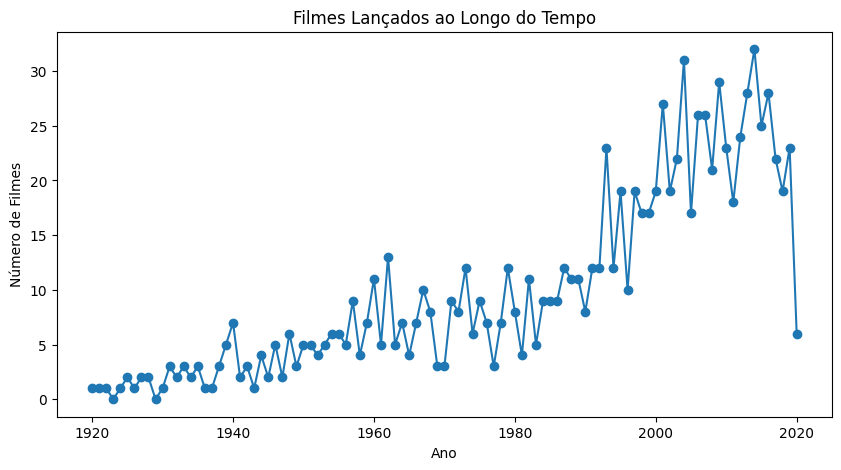

In [28]:
# Movies Released Over Time
raw_df['Released_Year'] = pd.to_numeric(raw_df['Released_Year'], errors='coerce')
year_counts = raw_df['Released_Year'].value_counts().sort_index()
all_years = pd.Series(0, index=range(int(raw_df['Released_Year'].min()), int(raw_df['Released_Year'].max())+1))
year_counts = all_years.add(year_counts, fill_value=0)
# plot
plt.figure(figsize=(10,5))
year_counts.plot(kind="line", marker='o')
plt.title("Filmes Lançados ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Número de Filmes")
plt.show()

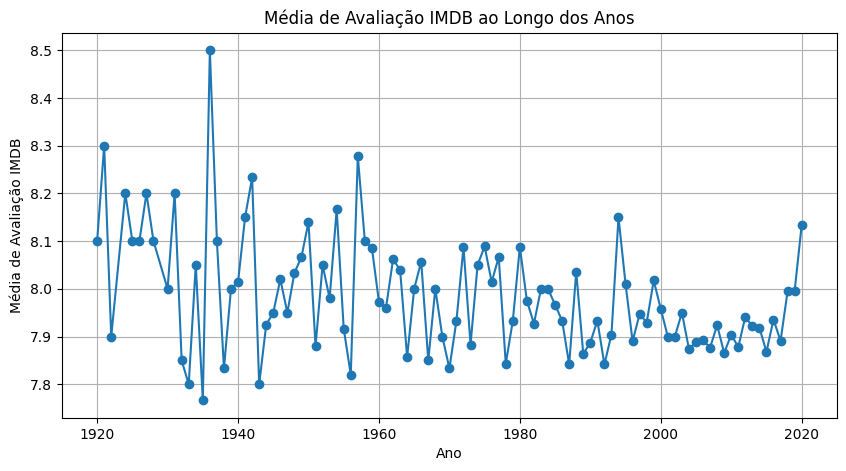

In [27]:
raw_df['Released_Year'] = pd.to_numeric(raw_df['Released_Year'], errors='coerce')
avg_rating = raw_df.groupby("Released_Year")["IMDB_Rating"].mean().reset_index()
avg_rating = avg_rating.sort_values("Released_Year")
plt.figure(figsize=(10,5))
plt.plot(avg_rating['Released_Year'], avg_rating['IMDB_Rating'], marker='o', linestyle='-')
plt.title("Média de Avaliação IMDB ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Média de Avaliação IMDB")
plt.grid(True)
plt.show()

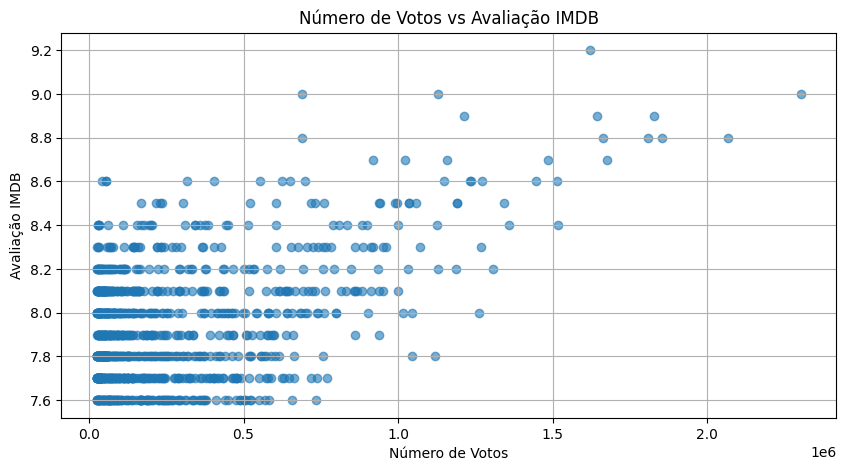

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(raw_df['No_of_Votes'], raw_df['IMDB_Rating'], alpha=0.6)
plt.title("Número de Votos vs Avaliação IMDB")
plt.xlabel("Número de Votos")
plt.ylabel("Avaliação IMDB")
plt.grid(True)
plt.show()

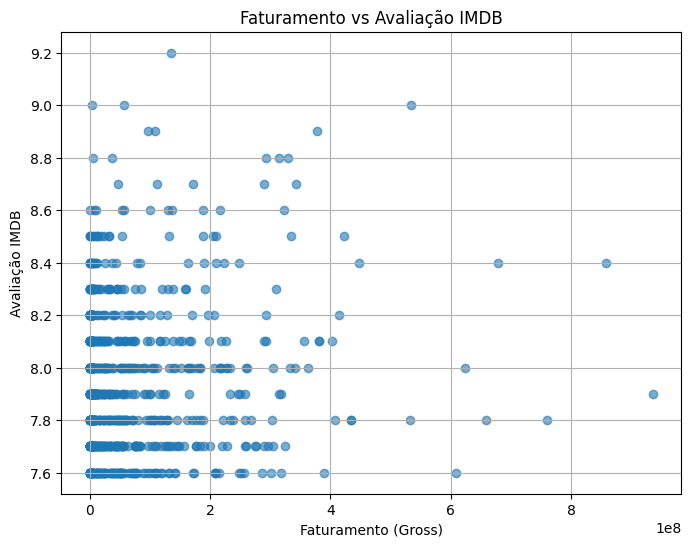

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(raw_df['Gross'], raw_df['IMDB_Rating'], alpha=0.6)
plt.title("Faturamento vs Avaliação IMDB")
plt.xlabel("Faturamento (Gross)")
plt.ylabel("Avaliação IMDB")
plt.grid(True)
plt.show()

### Correlação entre variáveis quantitativas

In [ ]:
plot_numeric_correlation(raw_df)

In [16]:
plot_categorical_association(raw_df, alpha= 0.05, top_k = 20)

###  Hipóteses 

- H1: Filmes dirigidos por certos diretores ou com determinados atores tendem a ter notas mais altas no IMDB.  
  Observação: Pode ser testado com estatísticas agregadas por diretor e elenco.

- H2: Filmes com maior faturamento (*Gross*) têm correlação positiva com IMDB Rating.  
  Observação: Correlação moderada já observada; pode ser confirmada com análise estatística.

- H3: O número de votos (*No_of_Votes*) está positivamente relacionado com a nota do IMDB.  
  Observação: Correlação baixa-moderada observada; hipótese parcialmente confirmada.

- H4: O ano de lançamento influencia a quantidade de filmes produzidos.  
  Observação: A maioria dos filmes foi produzida entre 2000 e 2019, com pico entre 2010 e 2014. Houve queda em 2020, possivelmente devido à pandemia.

- H5: O tempo de duração (*Runtime*) dos filmes tende a se concentrar em um intervalo específico.  
  Observação: A maioria dos filmes tem duração entre 100 e 130 minutos.

- H6: Certos gêneros ou certificados podem influenciar a nota média dos filmes.  
  Observação: Pode ser analisado com teste de qui-quadrado ou ANOVA.


https://www.kaggle.com/code/imaadmahmood/tmdb-dataset-analysis

https://www.kaggle.com/code/alisamy/movie-recommendation-system-using-ml  (sistema de recoemndacao aq)

(nuvens de ponto tbm)


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score

# 💾 Select Features and Target
target = "IMDB_Rating"
numeric_features = ["Released_Year", "Runtime", "Meta_score", "No_of_Votes", "Gross"]
categorical_features = ["Certificate", "Genre", "Director"]

X = df[numeric_features + categorical_features]
y = df[target]

# 🔧 Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", min_frequency=10))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# 🧪 Models to Evaluate
models = {
    "RandomForest":  RandomForestRegressor(n_estimators=300, random_state=42),
    "GradientBoost": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

# 🔁 Evaluate with 5-fold CV
print("Cross-Validation Scores (MAE):\n")
for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    scores = cross_val_score(pipe, X, y, cv=5, scoring="neg_mean_absolute_error")
    print(f"{name:15s} MAE: {-scores.mean():.3f} ± {scores.std():.3f}")

# 🧠 Final Model Train-Test Evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

final_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1))
])

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("\nFinal Model Performance on Test Set:")
print(f"MAE  : {mean_absolute_error(y_test, y_pred):.3f}")
print(f"R2   : {r2_score(y_test, y_pred):.3f}")

In [ ]:
import shap

# 🔄 Re-transform the train data
X_train_transformed = preprocessor.fit_transform(X_train)

# ✅ Use only the trained model inside pipeline
model_trained = final_model.named_steps["model"]

# ⛔ SHAP only works with numpy arrays (ensure type is correct)
X_train_np = X_train_transformed.toarray() if hasattr(X_train_transformed, "toarray") else X_train_transformed

# ⚡ Create SHAP explainer and compute values
explainer = shap.Explainer(model_trained)
shap_values = explainer(X_train_np)

# 📊 Plot SHAP summary bar chart for top features
shap.summary_plot(shap_values, features=X_train_np, feature_names=final_model.named_steps["preprocessor"].get_feature_names_out(), plot_type="bar")

Director
Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Akira Kurosawa      10
Martin Scorsese     10
                    ..
Josh Boone           1
Roberto Benigni      1
James Marsh          1
Paul Haggis          1
James Simone         1
Name: count, Length: 200, dtype: Int64

In [ ]:
step 9A: IMDb Rating vs TMDB Rating
This scatter plot gives us a side-by-side visual of how movies are rated by IMDb users vs TMDB users. It's a quick way to spot consistent hits or polarizing films.

plt.figure(figsize=(9,6))
sns.scatterplot(
    data=df_tmdb,
    x="IMDB_Rating",
    y="TMDB_Rating",
    alpha=0.7,
    color="#7dd3fc",
    edgecolor="white"
)
plt.title("IMDb vs TMDB Ratings", fontsize=14)
plt.xlabel("IMDb Rating")
plt.ylabel("TMDB Rating")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
# Média da nota por diretor
mean_ratings = raw_df.groupby('Director')['IMDB_Rating'].mean()

# Combinar com contagem de filmes
director_stats = pd.DataFrame({
    'num_filmes': director_counts,
    'mean_rating': mean_ratings
})

# Correlação
print(director_stats.corr())


             num_filmes  mean_rating
num_filmes     1.000000     0.150222
mean_rating    0.150222     1.000000


In [28]:
# Contagem de filmes por diretor
director_counts = raw_df['Director'].value_counts()

# Média de nota por diretor
mean_ratings = raw_df.groupby('Director')['IMDB_Rating'].mean()

# Combinar em um DataFrame
director_stats = pd.DataFrame({
    'num_filmes': director_counts,
    'mean_rating': mean_ratings
}).reset_index().rename(columns={'index': 'Director'})


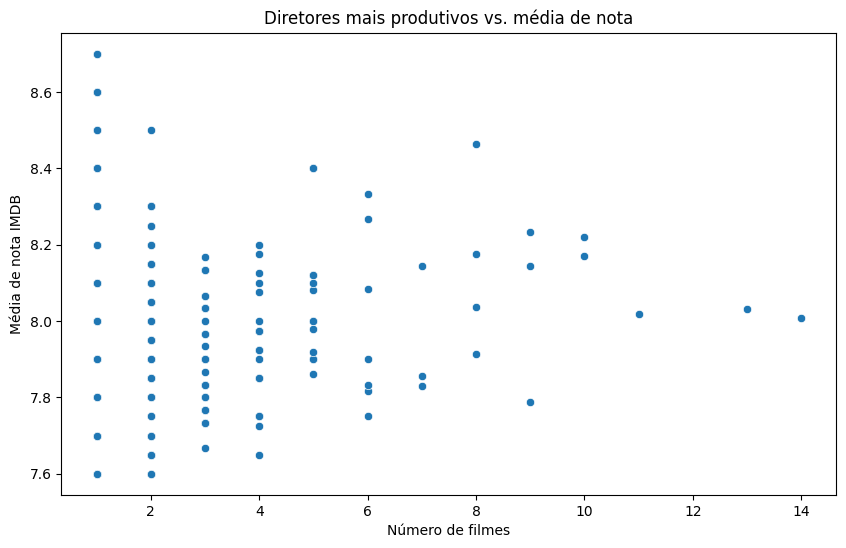

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=director_stats, x='num_filmes', y='mean_rating')
plt.xlabel('Número de filmes')
plt.ylabel('Média de nota IMDB')
plt.title('Diretores mais produtivos vs. média de nota')
plt.show()
